In [1]:
import os
import tensorflow as tf

dir = os.path.dirname(os.path.realpath("__file__"))
v1 = tf.Variable(1., name="v1")
v2 = tf.Variable(2., name="v2")
a =tf.add(v1, v2)
print(a.graph == tf.get_default_graph())
all_saver = tf.train.Saver()
v2_saver = tf.train.Saver({"v2": v2})
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    all_saver.save(sess, dir + '/data-all')
    v2_saver.save(sess, dir +  '/data=v2')

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


True


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
with tf.Session() as sess:
    first_image = mnist.test.images[0]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

NameError: name 'tf' is not defined

In [27]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

learning_rate = 0.001
num_steps = 500
batch_size = 128
display_step = 10
num_input = 784
num_classes = 10
dropout = 0.7

X =tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32)

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding="SAME")
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding="SAME")

def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    fc1 = tf.nn.dropout(fc1, dropout)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.8})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images[:256], Y: mnist.test.labels[:256], keep_prob: 1.0}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1, Minibatch Loss= 109901.6562, Training Accuracy= 0.062
Step 10, Minibatch Loss= 29919.2695, Training Accuracy= 0.148


KeyboardInterrupt: 

In [28]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

batch_size = 128
test_size = 256

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    l1 = tf.nn.dropout(l1, p_keep_conv)

    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                     # l2a shape=(?, 14, 14, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],              # l2 shape=(?, 7, 7, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,                     # l3a shape=(?, 7, 7, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],              # l3 shape=(?, 4, 4, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])    # reshape to (?, 2048)
    l3 = tf.nn.dropout(l3, p_keep_conv)

    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)

    pyx = tf.matmul(l4, w_o)
    return pyx

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = trX.reshape(-1, 28, 28, 1)  # 28x28x1 input img
teX = teX.reshape(-1, 28, 28, 1)  # 28x28x1 input img

X = tf.placeholder("float", [None, 28, 28, 1])
Y = tf.placeholder("float", [None, 10])

w = init_weights([3, 3, 1, 32])       # 3x3x1 conv, 32 outputs
w2 = init_weights([3, 3, 32, 64])     # 3x3x32 conv, 64 outputs
w3 = init_weights([3, 3, 64, 128])    # 3x3x32 conv, 128 outputs
w4 = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
w_o = init_weights([625, 10])         # FC 625 inputs, 10 outputs (labels)

p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=py_x, labels=Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(100):
        training_batch = zip(range(0, len(trX), batch_size),
                             range(batch_size, len(trX)+1, batch_size))
        for start, end in training_batch:
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                          p_keep_conv: 0.8, p_keep_hidden: 0.5})

        test_indices = np.arange(len(teX)) # Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                         Y: teY[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0})))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


KeyboardInterrupt: 

[[[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]


 [[[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]

  [[0. 0.]]]]


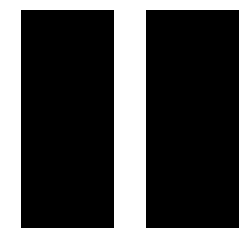

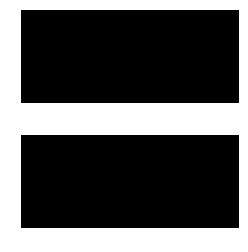

In [10]:
import os
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def save_fig(fig_id, tight_layout=True):
    path = os.path.join("//images/", fig_id + ".png")
    plt.savefig(path, format='png', dpi=300)

def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.axis("off")
    
# 7 x 7 필터 1컬러 2채널의 필터 공간 확보
fmap = np.zeros(shape=(7,7,1,2), dtype= np.float32)
print(fmap)
fmap[:, 3, 0,0] = 1 # 세로줄 필터
fmap[3, :, 0,1] = 1 # 가로줄 필터 
fmap[:, :, 0, 0]

plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in

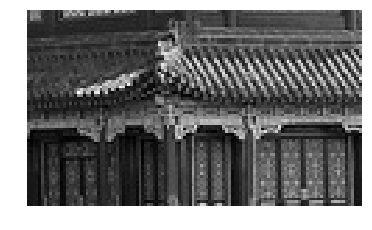

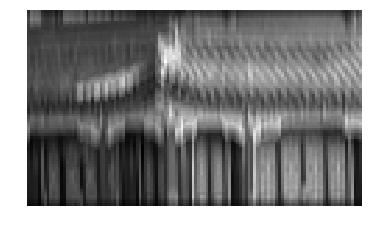

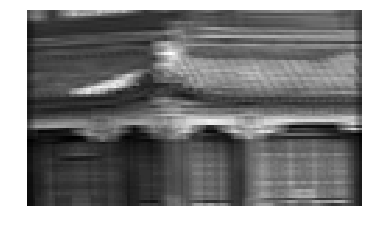

In [18]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
# 이미지 clipping
image = china[150:220, 130:250]
height, width, channels = image.shape
# 색 벡터의 평균값을 내면 RGB의 평균값이므로 색은 흑백으로 된다.
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
# cuda 과학계산용 cudann 신경망 => tensorflow GPU
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME", use_cudnn_on_gpu=False)

with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

plot_image(images[0, :, :, 0])
#ave_fig("china_original", tight_layout=False)
plt.show()

plot_image(output[0, :, :, 0])
#save_fig("china_vertical", tight_layout=False)
plt.show()

plot_image(output[0, :, :, 1])
#save_fig("china_horizontal", tight_layout=False)
plt.show()

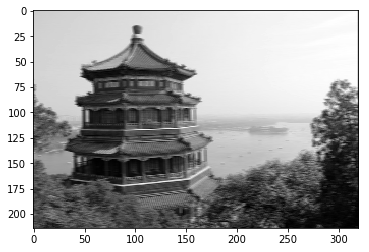

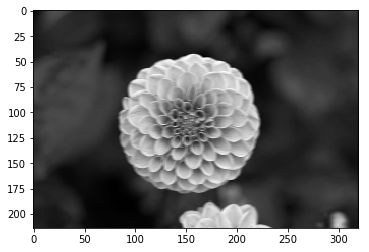

In [24]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})
    
plt.imshow(output[0, :, :, 1],cmap="gray")
plt.show()
plt.imshow(output[1, :, :, 1],cmap="gray")
plt.show()

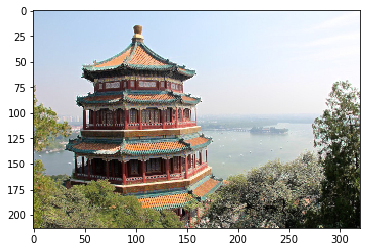

In [26]:
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()

In [3]:
# Lab 10 MNIST and Deep learning CNN
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 64

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [5]:
# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        if i % 10 == 0 :
            print('batch:', '%04d' % (i), 'cost =', '{:.9f}'.format(avg_cost))
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size):
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]

        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch

    return correct_sample / N

print("\nAccuracy Evaluates")
print("-------------------------------")
print('Train Accuracy:', evaluate(mnist.train.images, mnist.train.labels))
print('Test Accuracy:', evaluate(mnist.test.images, mnist.test.labels))


# Get one and predict
print("\nGet one and predict")
print("-------------------------------")
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), {X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Learning stared. It takes sometime.
Epoch: 0001 cost = 0.385748474
Epoch: 0002 cost = 0.092017397
Epoch: 0003 cost = 0.065854684
Epoch: 0004 cost = 0.055604566
Epoch: 0005 cost = 0.045996377
Epoch: 0006 cost = 0.040913645
Epoch: 0007 cost = 0.036924479
Epoch: 0008 cost = 0.032808939
Epoch: 0009 cost = 0.031791007
Epoch: 0010 cost = 0.030224456
Epoch: 0011 cost = 0.026849916
Epoch: 0012 cost = 0.026826763
Epoch: 0013 cost = 0.027188021
Epoch: 0014 cost = 0.023604777
Epoch: 0015 cost = 0.024607201
Learning Finished!
Accuracy: 0.9938
'''

Learning stared. It takes sometime.
batch: 0000 cost = 0.000168536
batch: 0010 cost = 0.001873747
batch: 0020 cost = 0.003429854
batch: 0030 cost = 0.005395582
batch: 0040 cost = 0.007307629
batch: 0050 cost = 0.009112075
batch: 0060 cost = 0.010861515
batch: 0070 cost = 0.013003178
batch: 0080 cost = 0.015041579
batch: 0090 cost = 0.016945553
batch: 0100 cost = 0.018531959
batch: 0110 cost = 0.020192128
batch: 0120 cost = 0.021421011
batch: 0130 cost = 0.023071704
batch: 0140 cost = 0.023995076
batch: 0150 cost = 0.025806350
batch: 0160 cost = 0.026954891
batch: 0170 cost = 0.028033958
batch: 0180 cost = 0.029476054
batch: 0190 cost = 0.030708881
batch: 0200 cost = 0.032465599
batch: 0210 cost = 0.033629190
batch: 0220 cost = 0.035072560
batch: 0230 cost = 0.036337124
batch: 0240 cost = 0.037830339
batch: 0250 cost = 0.039684009
batch: 0260 cost = 0.041362731
batch: 0270 cost = 0.043227274
batch: 0280 cost = 0.044780022
batch: 0290 cost = 0.046419390
batch: 0300 cost = 0.047652705
bat

'\nLearning stared. It takes sometime.\nEpoch: 0001 cost = 0.385748474\nEpoch: 0002 cost = 0.092017397\nEpoch: 0003 cost = 0.065854684\nEpoch: 0004 cost = 0.055604566\nEpoch: 0005 cost = 0.045996377\nEpoch: 0006 cost = 0.040913645\nEpoch: 0007 cost = 0.036924479\nEpoch: 0008 cost = 0.032808939\nEpoch: 0009 cost = 0.031791007\nEpoch: 0010 cost = 0.030224456\nEpoch: 0011 cost = 0.026849916\nEpoch: 0012 cost = 0.026826763\nEpoch: 0013 cost = 0.027188021\nEpoch: 0014 cost = 0.023604777\nEpoch: 0015 cost = 0.024607201\nLearning Finished!\nAccuracy: 0.9938\n'